In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

In [ ]:
# Source:
# https://www.geeksforgeeks.org/how-to-search-and-replace-text-in-a-file-in-python/


with open(r"..\Dados brutos\INMET\CatalogoEstaçõesAutomáticas.csv", "r+") as file:
    data = file.read()
    data = data.replace(",",".") # Substituindo vírgulas por pontos para não prejudicar a leitura dos arquivos .csv
    file.close()

with open(r"..\Dados brutos\INMET\CatálogoEstaçõesAutomáticas2.csv","w") as file:
    file.write(data)
    file.close()    


In [3]:
df_estacoes = pd.read_csv(r"..\Dados brutos\INMET\CatálogoEstaçõesAutomáticas2.csv",encoding="latin",sep=";")
df_estacoes.head()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ABROLHOS,BA,Pane,-17.963056,-38.703333,20.93,20/07/2008,A422
1,ACARAU,CE,Operante,-3.121111,-40.087222,67.15,21/04/2009,A360
2,AFONSO CLAUDIO,ES,Operante,-20.104167,-41.106944,507.48,23/09/2011,A657
3,AGUA BOA,MT,Pane,-14.016389,-52.211667,440.00,15/12/2006,A908
4,AGUA CLARA,MS,Operante,-20.444444,-52.875833,323.63,13/08/2010,A756


In [4]:
df_estacoes.describe()

,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE
count,566.000000,566.000000,566.000000
mean,-15.856405,-47.899998,416.394028
std,8.206202,6.890449,339.221062
min,-33.742222,-72.786667,2.000000
25%,-22.355345,-52.337917,126.902500
50%,-16.213611,-47.964444,366.790000
75%,-8.954653,-42.702708,645.967500
max,3.813611,-34.815556,1790.380000


In [6]:
df_usinas = pd.read_csv(r"..\Dados tratados\LISTA - USINAS.csv")
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [7]:
brasil_map = gpd.read_file(r"..\Dados brutos\IBGE\Shapefiles\BR_UF_2021\BR_UF_2021.shp")

<AxesSubplot:>

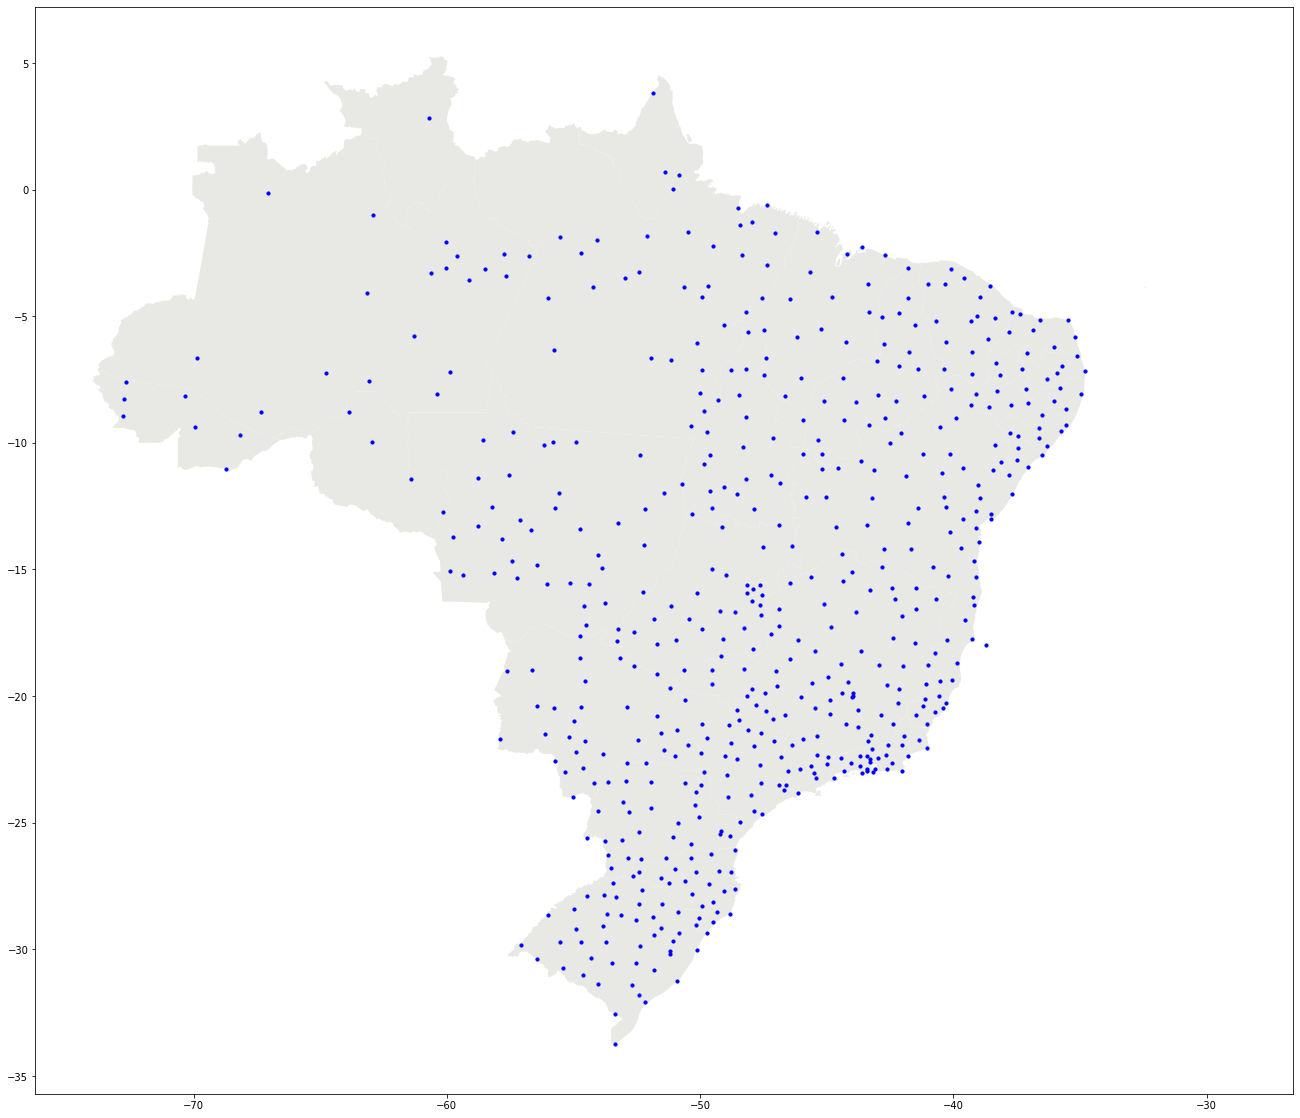

In [8]:
figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")

    
geometria_estacoes = [Point(coords) for coords in zip(df_estacoes['VL_LONGITUDE'], df_estacoes['VL_LATITUDE'])]
geo_df_estacoes = gpd.GeoDataFrame(df_estacoes, geometry = geometria_estacoes)
geo_df_estacoes.plot(ax = eixo, markersize = 10, color = "blue", alpha = 1)

In [9]:
tipos_de_usina = ["bio_agro","bio_liquido","bio_floresta","bio_animal","bio_residuo",
                  "eolica",
                  "petroleo","carvao","gas","outros_fosseis",
                  "nuclear",
                  "solar",
                  "hidrica"]
rotulos = ["Agroindustriais","Biocombustíveis líquidos","Floresta","Resíduos animais","Resíduos sólidos urbanos",
          "Cinética do vento",
           "Petróleo","Carvão mineral","Gás natural","Outros Fósseis",
           "Urânio",
           "Radiação solar",
           "Potencial hidráulico"]

cores = ["#0aa648", "#0aa648", "#0aa648", "#0aa648", "#0aa648",
        "#ff67f1",
        "#340202", "#340202", "#340202", "#340202",
        "#ad0de2",
        "gold",
        "#59bfff"]

geo_df_dict = {}
for tipo_de_usina, rotulo, cor in zip(tipos_de_usina, rotulos, cores):
    geo_df_dict[tipo_de_usina]={
        "rotulo":rotulo,
        "filtro":df_usinas[(df_usinas["DscFonteCombustivel"]==rotulo)],
        "cor":cor
    }
    

for key in geo_df_dict.keys():
    filtro = geo_df_dict[key]["filtro"]
    geo_df_dict[key]["geometria"] = [Point(coords) for coords in zip(filtro['NumCoordEEmpreendimento'], filtro['NumCoordNEmpreendimento'])]
    geometria = geo_df_dict[key]["geometria"]
    geo_df_dict[key]["geo_df"] = gpd.GeoDataFrame(filtro, geometry = geometria)

<AxesSubplot:>

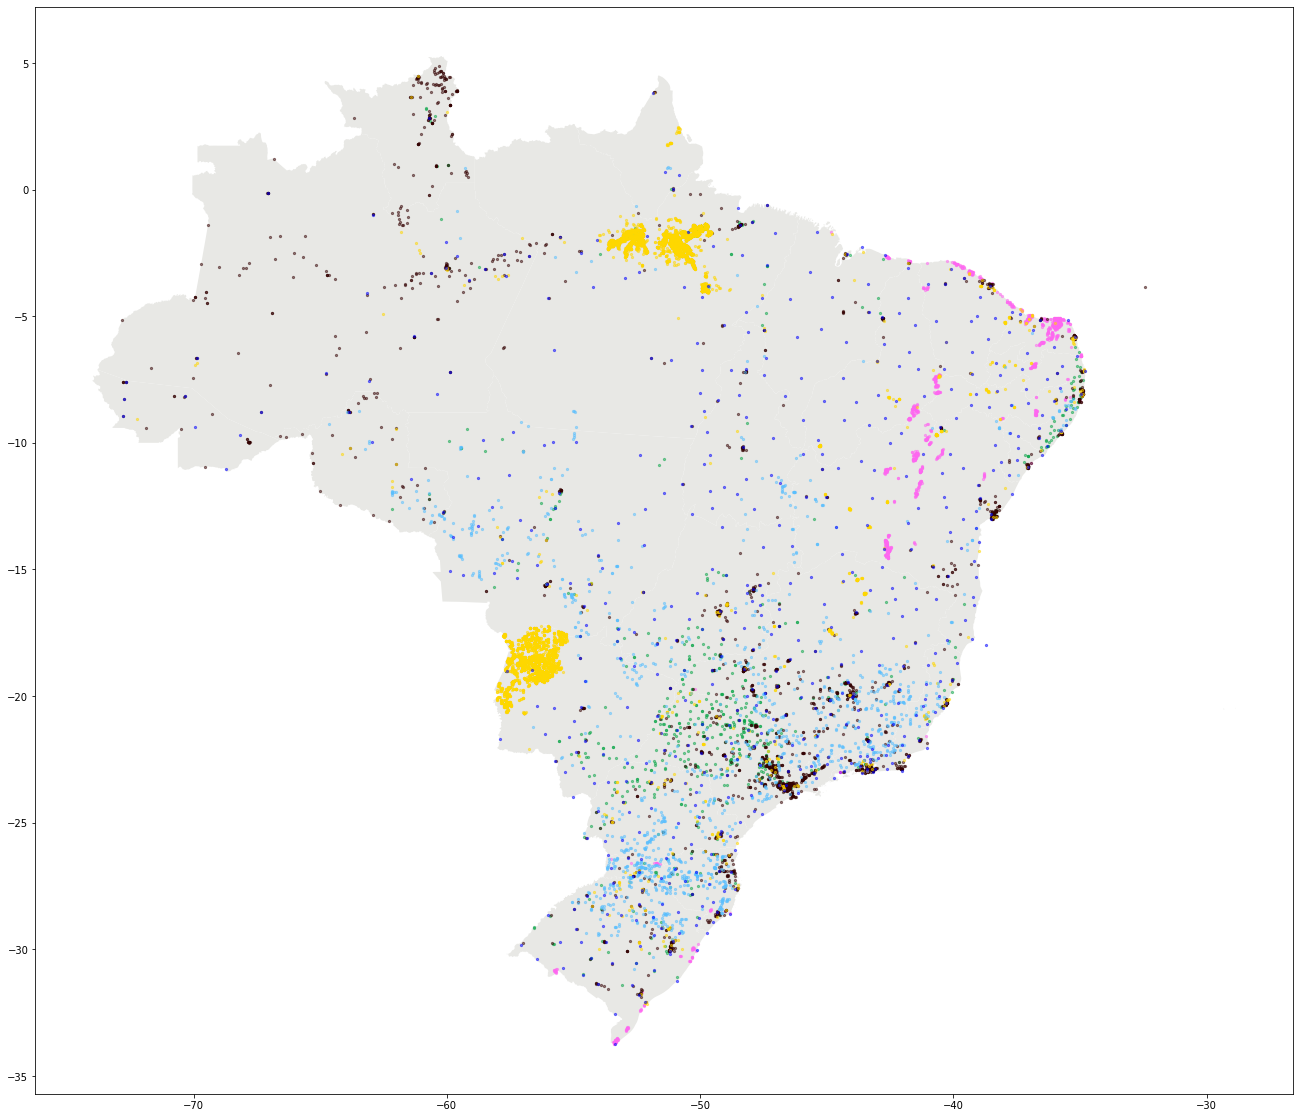

In [10]:
figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
for key in geo_df_dict.keys():
    cor = geo_df_dict[key]["cor"]
    geo_df_dict[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 0.5)
    
geometria_estacoes = [Point(coords) for coords in zip(df_estacoes['VL_LONGITUDE'], df_estacoes['VL_LATITUDE'])]
geo_df_estacoes = gpd.GeoDataFrame(df_estacoes, geometry = geometria_estacoes)
geo_df_estacoes.plot(ax = eixo, markersize = 5, color = "blue", alpha = 0.5)

In [11]:
 # verificando a integridade e a presença de todas as unidades federativas em ambos os conjuntos de dados
lista_de_estados = list(df_usinas["SigUFPrincipal"].unique())
lista_de_estados.sort()
print(lista_de_estados, len(lista_de_estados))

lista_de_estados = list(df_estacoes["SG_ESTADO"].unique())
lista_de_estados.sort()
print(lista_de_estados, len(lista_de_estados))

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'] 27
['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'] 27


In [12]:
# criando uma nova coluna contendo o código de identificação da estação de medição mais próxima a cada usina
df_usinas["EstaçãoMeteorológicaMaisPróxima"] = np.nan
df_usinas["DistânciaUsinaEstação"] = np.nan
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios,EstaçãoMeteorológicaMaisPróxima,DistânciaUsinaEstação
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,NaN,NaN
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,NaN,NaN
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,NaN,NaN
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS,NaN,NaN
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS,NaN,NaN


In [13]:
import haversine as hs

for i_usina, linha_usina in df_usinas.iterrows():
    lat_usina = linha_usina["NumCoordNEmpreendimento"]
    long_usina = linha_usina["NumCoordEEmpreendimento"]
    janela_de_busca = 10 # buscarei por uma estação localizada ao redor de cada usina, em uma janela de 10 graus de comprimento
    d = janela_de_busca / 2
    limite_norte, limite_sul, limite_leste, limite_oeste = [lat_usina + d,
                                                           lat_usina - d,
                                                           long_usina + d,
                                                           long_usina - d]
    filtro_estacao = df_estacoes[(df_estacoes["VL_LATITUDE"] < limite_norte) & (df_estacoes["VL_LATITUDE"] > limite_sul) & (df_estacoes["VL_LONGITUDE"] < limite_leste) & (df_estacoes["VL_LONGITUDE"] > limite_oeste)]
    if len(filtro_estacao) == 0: # se não houver estações meteorológicas dentro da janela de busca
        filtro_estacao = df_estacoes # busca por estações próximas pelo Brasil todo
        print("buscando no Brasil todo", lat_usina, long_usina)
        print(limite_norte, limite_sul, limite_leste, limite_oeste,"\n")

    distancia_min = 100000000
    estacao_mais_proxima=""
    
    for i_estacao, linha_estacao in filtro_estacao.iterrows():
        lat_estacao = df_estacoes.at[i_estacao, "VL_LATITUDE"]
        long_estacao = df_estacoes.at[i_estacao, "VL_LONGITUDE"]
        distancia = hs.haversine((lat_usina, long_usina),(lat_estacao, long_estacao), unit = hs.Unit.KILOMETERS) # Referência: https://www.askpython.com/python/examples/find-distance-between-two-geo-locations
        if distancia < distancia_min:
            distancia_min = distancia
            estacao_mais_proxima = df_estacoes.at[i_estacao, "CD_ESTACAO"]
            latitude_estacao_mais_proxima = df_estacoes.at[i_estacao, "VL_LATITUDE"]
            longitude_estacao_mais_proxima = df_estacoes.at[i_estacao, "VL_LONGITUDE"]
            
    df_usinas.at[i_usina, "EstaçãoMeteorológicaMaisPróxima"] = estacao_mais_proxima
    df_usinas.at[i_usina, "LatitudeEstaçãoMeteorológica"] = latitude_estacao_mais_proxima
    df_usinas.at[i_usina, "LongitudeEstaçãoMeteorológica"] = longitude_estacao_mais_proxima
    df_usinas.at[i_usina, "DistânciaUsinaEstação"] = distancia_min

    
df_usinas.head()       
    

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios,EstaçãoMeteorológicaMaisPróxima,DistânciaUsinaEstação,LatitudeEstaçãoMeteorológica,LongitudeEstaçãoMeteorológica
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,A555,18.012406,-20.031389,-44.011111
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,A555,17.922007,-20.031389,-44.011111
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG,A555,17.153996,-20.031389,-44.011111
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS,A840,17.611029,-29.164581,-51.534202
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS,A828,29.654539,-27.657778,-52.305833


In [14]:
df_usinas.to_csv(r"..\Dados tratados\LISTA - USINAS E ESTAÇÕES.csv", encoding = "utf-8", index=False)

In [15]:
df_usinas = pd.read_csv(r"..\Dados tratados\LISTA - USINAS E ESTAÇÕES.csv")
df_usinas.head()

lista_de_estacoes_mais_proximas = list(df_usinas["EstaçãoMeteorológicaMaisPróxima"].unique())
lista_de_estacoes_mais_proximas.sort()
print(len(lista_de_estacoes_mais_proximas))


filtro_estacoes_proximas = df_estacoes["CD_ESTACAO"].isin(lista_de_estacoes_mais_proximas)
df_estacoes_proximas = df_estacoes[filtro_estacoes_proximas]
df_estacoes_proximas.describe()

479


,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE
count,479.000000,479.000000,479.000000
mean,-16.683015,-48.369850,435.876326
std,8.254403,7.010930,353.122696
min,-33.742222,-72.786667,2.000000
25%,-22.655956,-52.601806,110.865000
50%,-17.798889,-48.515833,398.750000
75%,-9.890833,-43.199444,680.335000
max,3.813611,-34.815556,1790.380000


<AxesSubplot:>

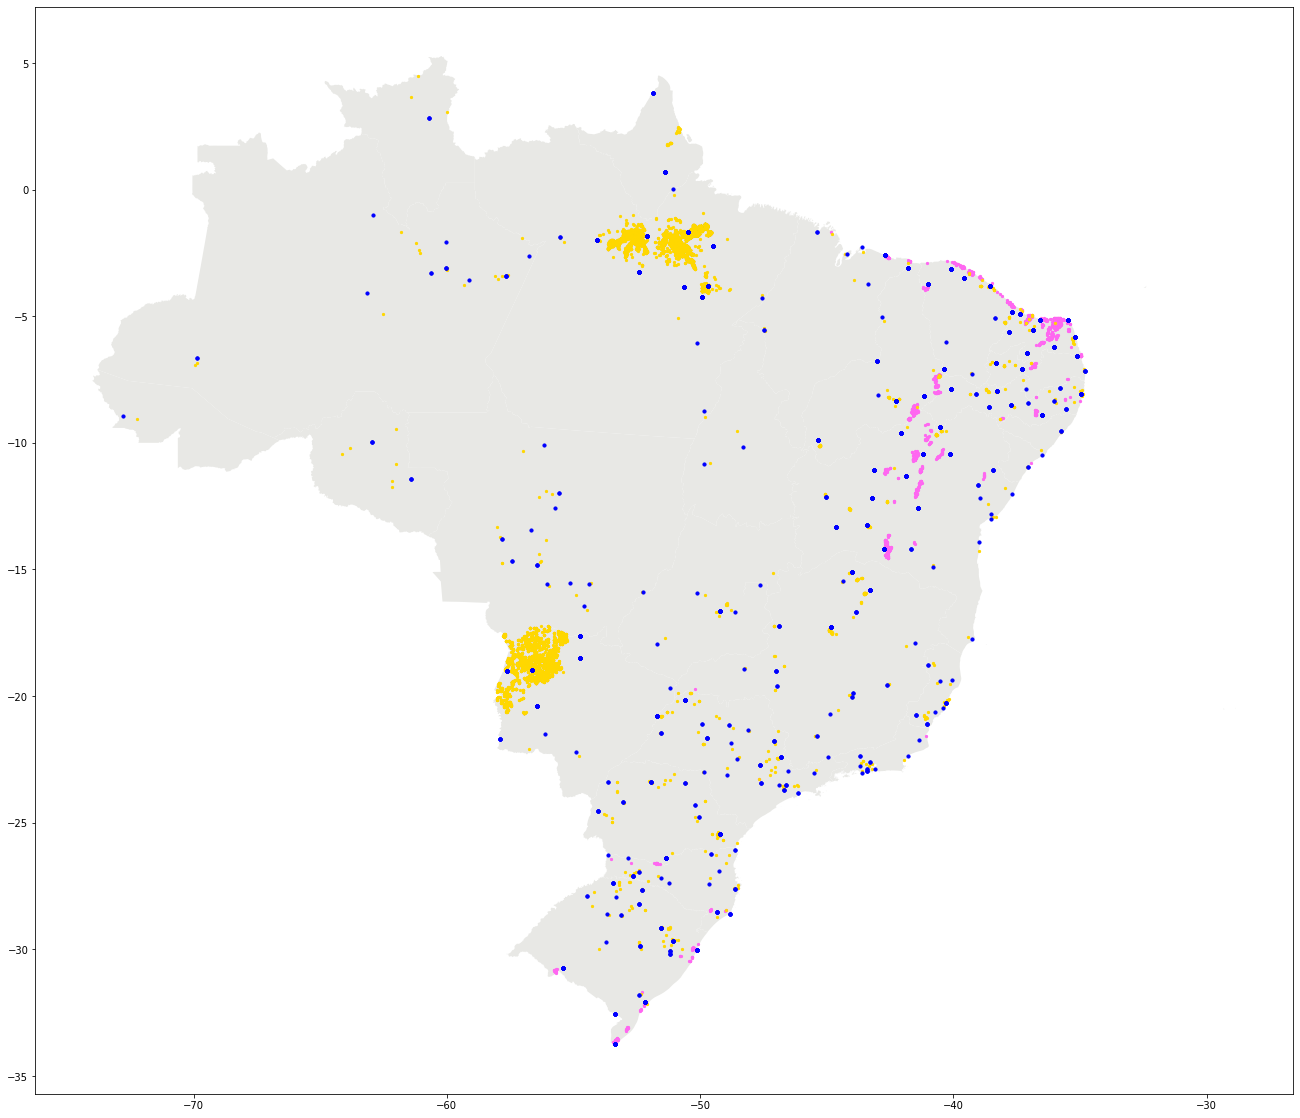

In [16]:
figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")

for key in geo_df_dict.keys():
    if key in ["eolica", "solar"]:
        cor = geo_df_dict[key]["cor"]
        geo_df_dict[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 1)

filtro_usinas_eolicas_solares = df_usinas[(df_usinas["DscOrigemCombustivel"]=="Solar")|(df_usinas["DscOrigemCombustivel"]=="Eólica")]
filtro_usinas_eolicas_solares.head()

geometria_estacoes_proximas = [Point(coords) for coords in zip(filtro_usinas_eolicas_solares['LongitudeEstaçãoMeteorológica'], filtro_usinas_eolicas_solares['LatitudeEstaçãoMeteorológica'])]
geo_df_estacoes_proximas = gpd.GeoDataFrame(filtro_usinas_eolicas_solares, geometry = geometria_estacoes_proximas)
geo_df_estacoes_proximas.plot(ax = eixo, markersize = 10, color = "blue")
